# Разработка A/B-тестирования и анализ результатов

Вы работаете продуктовым аналитиком в компании, которая разрабатывает развлекательное приложение с функцией «бесконечной» ленты, как, например, в приложениях с короткими видео. В вашем приложении существует две модели монетизации: первая — ежемесячная платная подписка, которая позволяет пользователям смотреть ленту без рекламы, вторая — демонстрация рекламы для пользователей, которые ещё не оформили подписку.

Команда разработчиков рекомендательных систем создала новый алгоритм рекомендаций, который, по их мнению, будет показывать более интересный контент для каждого пользователя. Вас, как аналитика, просят помочь рассчитать параметры A/B-теста, который позволит проверить эту гипотезу, и проанализировать его результаты.

Яфаров Ринат 15.03.2025

## Описание данных

Вы будете работать с тремя таблицами:

- `sessions_project_history.csv` — таблица с историческими данными по сессиям пользователей на период с 2025-08-15 по 2025-09-23. Путь к файлу: `/datasets/sessions_project_history.csv`.

- `sessions_project_test_part.csv` — таблица с данными за первый день проведения A/B-теста, то есть за 2025-10-14. Путь к файлу: `/datasets/sessions_project_test_part.csv`.

- `sessions_project_test.csv` — таблица с данными за весь период проведения A/B-теста, то есть с 2025-10-14 по 2025-11-02. Путь к файлу: `/datasets/sessions_project_test.csv`.

У этих таблиц почти совпадает структура и содержание колонок, различаются лишь периоды наблюдения.

Поля таблиц `sessions_project_history.csv`, `sessions_project_test.csv`, `sessions_project_test_part.csv`:

- `user_id` — идентификатор пользователя;

- `session_id` — идентификатор сессии в приложении;

- `session_date` — дата сессии;

- `session_start_ts` — дата и время начала сессии;

- `install_date` — дата установки приложения;

- `session_number` — порядковый номер сессии для конкретного пользователя;

- `registration_flag` — является ли пользователь зарегистрированным;

- `page_counter` — количество просмотренных страниц во время сессии;

- `region` — регион пользователя;

- `device` — тип устройства пользователя;

- `test_group` — тестовая группа (в таблице с историческими данными этого столбца нет).


## Что нужно сделать
Ваши задачи: рассчитать параметры теста, оценить корректность его проведения и проанализировать результаты эксперимента.

### 1. Работа с историческими данными (EDA)

#### 1.1. Загрузка исторических данных
На первом этапе поработайте с историческими данными приложения:

- Импортируйте библиотеку pandas.

- Считайте и сохраните в датафрейм `sessions_history` CSV-файл с историческими данными о сессиях пользователей `sessions_project_history.csv`.

Выведите на экран первые пять строк полученного датафрейма.

In [1]:
import pandas as pd
sessions_history = pd.read_csv('https://code.s3.yandex.net/datasets/sessions_project_history.csv')
sessions_history.head()

,user_id,session_id,session_date,session_start_ts,install_date,session_number,registration_flag,page_counter,region,device
0,E302123B7000BFE4,F9AF61A0C2023832,2025-08-15,2025-08-15 17:47:35,2025-08-15,1,0,3,CIS,iPhone
1,2530F72E221829FB,85003A206CBDAC6F,2025-08-15,2025-08-15 16:42:14,2025-08-15,1,0,4,MENA,Android
2,876E020A4FC512F5,3677423E49D72DEE,2025-08-15,2025-08-15 12:30:00,2025-08-15,1,0,4,EU,PC
3,2640B349E1D81584,956B45F5915CA225,2025-08-15,2025-08-15 15:31:31,2025-08-15,1,0,4,CIS,Android
4,94E1CBFAEF1F5EE9,83BF0DA35F9F1F40,2025-08-15,2025-08-15 21:33:53,2025-08-15,1,0,3,CIS,Android


#### 1.2. Знакомство с данными
- Для каждого уникального пользователя `user_id` рассчитайте количество уникальных сессий `session_id`.

- Выведите на экран все данные из таблицы `sessions_history` для одного пользователя с наибольшим количеством сессий. Если таких пользователей несколько, выберите любого из них.

- Изучите таблицу для одного пользователя, чтобы лучше понять логику формирования каждого столбца данных.



In [2]:
#группируем датафрейм и считаем количество уникальных сессий
user_df=sessions_history.groupby('user_id')['session_id'].count().reset_index()
user_df = user_df.sort_values(by='session_id',ascending=False)
user_df.head()

,user_id,session_id
8948,10E0DEFC1ABDBBE0,10
55627,6A73CB5566BB494D,10
72346,8A60431A825D035B,9
109383,D11541BAC141FB94,9
47956,5BCFE7C4DCC148E9,9


In [3]:
#выводим на экран пользователя с максимальным количеством ссесий
display(sessions_history[sessions_history['user_id']=='10E0DEFC1ABDBBE0'])

,user_id,session_id,session_date,session_start_ts,install_date,session_number,registration_flag,page_counter,region,device
115558,10E0DEFC1ABDBBE0,B8F0423BBFFCF5DC,2025-08-14,2025-08-14 13:57:39,2025-08-14,1,0,4,CIS,Android
191751,10E0DEFC1ABDBBE0,87CA2FA549473837,2025-08-15,2025-08-15 16:42:10,2025-08-14,2,0,3,CIS,Android
239370,10E0DEFC1ABDBBE0,4ADD8011DCDCE318,2025-08-16,2025-08-16 19:53:21,2025-08-14,3,0,3,CIS,Android
274629,10E0DEFC1ABDBBE0,DF0FD0E09BF1F3D7,2025-08-17,2025-08-17 15:03:43,2025-08-14,4,0,1,CIS,Android
302501,10E0DEFC1ABDBBE0,3C221774B4DE6885,2025-08-18,2025-08-18 17:29:14,2025-08-14,5,0,4,CIS,Android
325557,10E0DEFC1ABDBBE0,031BD7A67048105B,2025-08-19,2025-08-19 13:23:55,2025-08-14,6,0,2,CIS,Android
345336,10E0DEFC1ABDBBE0,FF4315CF4AD4B100,2025-08-20,2025-08-20 19:31:54,2025-08-14,7,0,2,CIS,Android
377532,10E0DEFC1ABDBBE0,4045FEA0747203B4,2025-08-22,2025-08-22 17:54:13,2025-08-14,8,0,2,CIS,Android
403538,10E0DEFC1ABDBBE0,344B086C421C7F37,2025-08-24,2025-08-24 14:46:13,2025-08-14,9,0,2,CIS,Android
414743,10E0DEFC1ABDBBE0,054F20BA371E4C9D,2025-08-25,2025-08-25 18:36:41,2025-08-14,10,0,3,CIS,Android


Были выведены все строки с информацией о пользователе с user_id = 10E0DEFC1ABDBBE0. Из вывода видно как формируются строки и видна корректность назначения номера ссесии

#### 1.3. Анализ числа регистраций
Одна из важнейших метрик продукта — число зарегистрированных пользователей. Используя исторические данные, визуализируйте, как менялось число регистраций в приложении за время его существования.

- Агрегируйте исторические данные и рассчитайте число уникальных пользователей и число зарегистрированных пользователей для каждого дня наблюдения. Для простоты считайте, что у пользователя в течение дня бывает одна сессия максимум и статус регистрации в течение одного дня не может измениться.

- Постройте линейные графики общего числа пользователей и общего числа зарегистрированных пользователей по дням. Отобразите их на одном графике.

- Постройте отдельный линейный график доли зарегистрированных пользователей от всех пользователей по дням.

- На обоих графиках должны быть заголовок, подписанные оси X и Y, сетка и легенда.

In [4]:
import matplotlib.pyplot as plt

In [5]:
#группируем столбцы по дням и считаем число всех уникальных пользователей
daily_users = sessions_history.groupby('session_date')['user_id'].nunique()
#группируем столбцы по дням и считаем число всех зарегистрированных пользователей
daily_registered_users = sessions_history[sessions_history['registration_flag'] == 1].groupby('session_date')['user_id'].nunique()


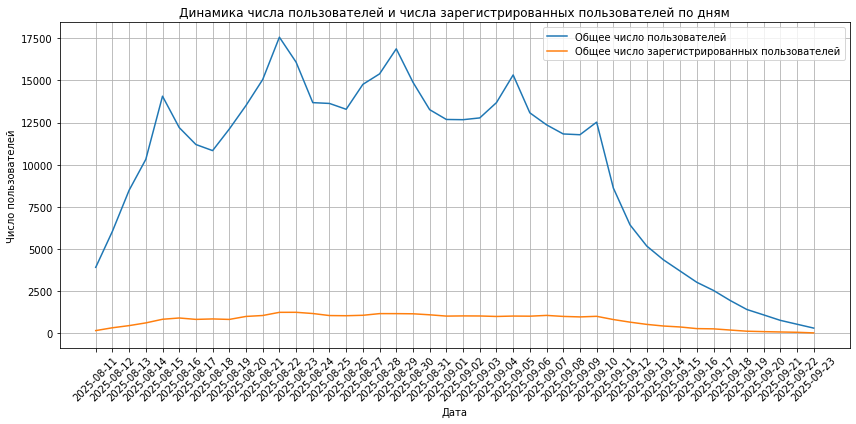

In [6]:
#визуализируем динамику числа пользователей по дням
plt.figure(figsize=(12, 6))
plt.plot(daily_users.index, daily_users.values, label='Общее число пользователей')
plt.plot(daily_registered_users.index, daily_registered_users.values, label='Общее число зарегистрированных пользователей')

plt.xlabel('Дата')
plt.ylabel('Число пользователей')
plt.title('Динамика числа пользователей и числа зарегистрированных пользователей по дням')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Из графика видно, что больше пользователей, которые не были зарегистрированны в приложении. Число пользователей по дням достаточно нестабильная величина исходя из графика, в некоторые дни видны достаточно очевидные скачки в значениях, это может быть связано,например, с тем, что пользователи более активно используют приложение в выходные дни.

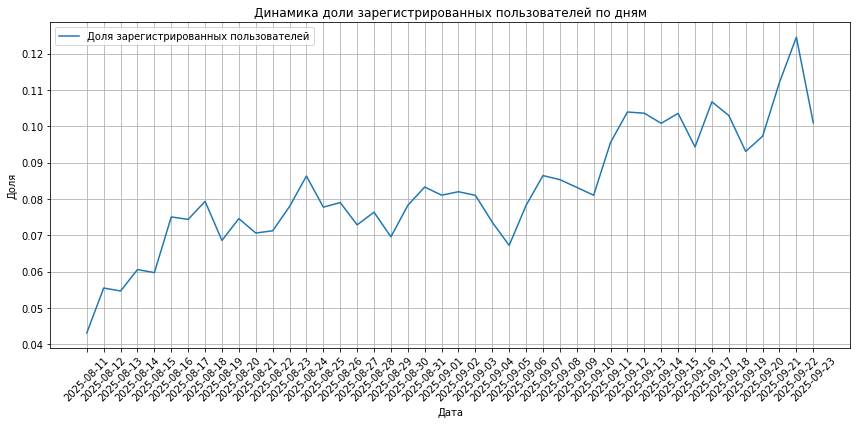

In [7]:
#рассчитываем долю зарегистрированных пользователей от общего количества по дням
daily_registration_rate = daily_registered_users / daily_users

# Построение графика
plt.figure(figsize=(12, 6))
plt.plot(daily_registration_rate.index, daily_registration_rate.values, label='Доля зарегистрированных пользователей')

plt.xlabel('Дата')
plt.ylabel('Доля')
plt.title('Динамика доли зарегистрированных пользователей по дням')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### 1.4. Анализ числа просмотренных страниц
Другая важная метрика продукта — число просмотренных страниц в приложении. Чем больше страниц просмотрено, тем сильнее пользователь увлечён контентом, а значит, выше шансы на то, что он зарегистрируется и оплатит подписку.

- Найдите количество сессий для каждого значения количества просмотренных страниц. Например: одну страницу просмотрели в 29160 сессиях, две страницы в 105536 сессиях и так далее.

- Постройте столбчатую диаграмму, где по оси X будет число просмотренных страниц, по оси Y — количество сессий.

- На диаграмме должны быть заголовок, подписанные оси X и Y.

In [8]:
# Группировка по количеству просмотренных страниц и подсчет сессий
session_counts = sessions_history.groupby('page_counter')['session_id'].count()

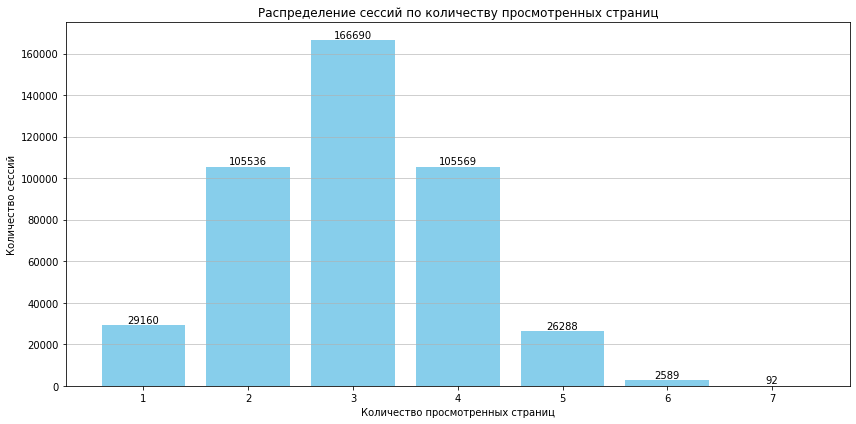

In [9]:
# Построение столбчатой диаграммы
plt.figure(figsize=(12, 6))
bars = plt.bar(session_counts.index, session_counts.values, color='skyblue')

plt.xlabel('Количество просмотренных страниц')
plt.ylabel('Количество сессий')
plt.title('Распределение сессий по количеству просмотренных страниц')
plt.grid(axis='y', alpha=0.75)

plt.xticks(session_counts.index)  # Убедимся, что все значения page_counter отображаются на оси X

# Добавление значений внутрь столбиков
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), ha='center', va='bottom', color='black')

plt.tight_layout()
plt.show()

Из диаграммы видно, что чаще всего пользователи просмотривают от 2 до 4 страниц.Также видно,что очень мало раз пользователи доходили до 7 просмотренных страниц

#### 1.5. Доля пользователей, просмотревших более четырёх страниц
Продуктовая команда продукта считает, что сессии, в рамках которых пользователь просмотрел 4 и более страниц, говорят об удовлетворённости контентом и алгоритмами рекомендаций. Этот показатель является важной прокси-метрикой для продукта.

- В датафрейме `sessions_history` создайте дополнительный столбец `good_session`. В него войдёт значение `1`, если за одну сессию было просмотрено 4 и более страниц, и значение `0`, если было просмотрено меньше.

- Постройте график со средним значением доли успешных сессий ко всем сессиям по дням за весь период наблюдения.

In [10]:
#создаем новый столбец для флага(количество просмотренных страниц >=4)
sessions_history['good_session'] = sessions_history['page_counter'].apply(lambda x: 1 if x >= 4 else 0)

In [11]:
# Агрегация данных по дням и расчет среднего значения good_session
daily_good_session_rate = sessions_history.groupby('session_date')['good_session'].mean()

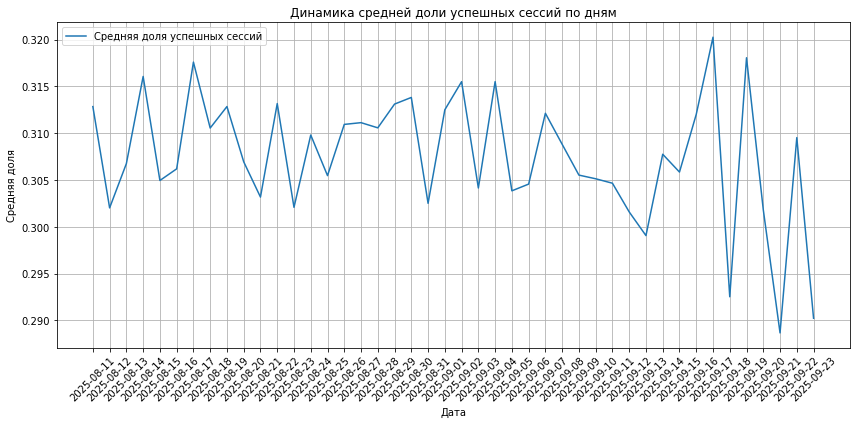

In [12]:
# Построение графика
plt.figure(figsize=(12, 6))
plt.plot(daily_good_session_rate.index, daily_good_session_rate.values, label='Средняя доля успешных сессий')

plt.xlabel('Дата')
plt.ylabel('Средняя доля')
plt.title('Динамика средней доли успешных сессий по дням')
plt.grid(True)
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

Из графика видна тенденция к резкому изменению значений средней доли успешных сессий по дням. Особенно это заметно под конец исследуемого периода.

### 2. Подготовка к тесту
При планировании теста необходимо проделать несколько важных шагов:

- Определиться с целевой метрикой.

- Рассчитать необходимый размер выборки.

- Исходя из текущих значений трафика, рассчитать необходимую длительность проведения теста.

#### 2.1. Расчёт размера выборки
В рамках курса вам уже приходилось рассчитывать размеры выборки, используя онлайн-калькуляторы. В этом задании предлагаем воспользоваться готовым кодом и рассчитать необходимое для вашего дизайна эксперимента количество пользователей.

Для этого установите в коде ниже следующие параметры:

- Уровень значимости — 0.05.

- Вероятность ошибки второго рода — 0.2.

- Мощность теста.

- Минимальный детектируемый эффект, или MDE, — 3%. Обратите внимание, что здесь нужно указать десятичную дробь, а не процент.

При расчёте размера выборки мы будем использовать метод `solve_power()` из класса `power.NormalIndPower` модуля `statsmodels.stats`.

Запустите ячейку и изучите полученное значение.

In [13]:
from statsmodels.stats.power import NormalIndPower

# Задаём параметры
alpha = 0.05  # Уровень значимости
beta = 0.2  # Ошибка второго рода, часто 1 - мощность
power = 0.8  # Мощность теста
mde = 0.03  # Минимальный детектируемый эффект

# Инициализируем класс NormalIndPower
power_analysis = NormalIndPower()

# Рассчитываем размер выборки
sample_size = power_analysis.solve_power(
    effect_size = mde,
    power = power,
    alpha = alpha,
    ratio = 1 # Равномерное распределение выборок
)

print(f"Необходимый размер выборки для каждой группы: {int(sample_size)}")

Необходимый размер выборки для каждой группы: 17441


#### 2.1. Расчёт длительности A/B-теста

Используйте данные о количестве пользователей в каждой выборке и среднем количестве пользователей приложения. Рассчитайте длительность теста, разделив одно на другое.

- Рассчитайте среднее количество уникальных пользователей приложения в день.

- Определите длительность теста, исходя из рассчитанного значения размера выборок и среднего дневного трафика приложения. Количество дней округлите в большую сторону.

In [14]:
from math import ceil

# Среднее количество пользователей приложения в день по историческим данным
avg_daily_users =sessions_history.groupby('session_date')['user_id'].nunique().mean()

# Рассчитываем длительность теста в днях как отношение размера выборки к среднему числу пользователей
test_duration = ceil(17441/avg_daily_users)

print(f"Рассчитанная длительность A/B-теста при текущем уровене трафика в {avg_daily_users} пользователей в день составит {test_duration} дней")

Рассчитанная длительность A/B-теста при текущем уровене трафика в 9907.363636363636 пользователей в день составит 2 дней


### 3. Мониторинг А/В-теста

#### 3.1. Проверка распределения пользователей

A/B-тест успешно запущен, и уже доступны данные за первые три дня. На этом этапе нужно убедиться, что всё идёт хорошо: пользователи разделены правильным образом, а интересующие вас метрики корректно считаются.

- Считайте и сохраните в датафрейм `sessions_test_part` CSV-файл с историческими данными о сессиях пользователей `sessions_project_test_part.csv`.

- Рассчитайте количество уникальных пользователей в каждой из экспериментальных групп для одного дня наблюдения.

- Рассчитайте и выведите на экран процентную разницу в количестве пользователей в группах A и B. Постройте любую удобную визуализацию, на которой можно было бы увидеть возможное различие двух групп.

Для расчёта процентной разницы воспользуйтесь формулой:
$$P = 100 \cdot  \frac{|A − B|}{A}$$

In [15]:
#загружаем данные
sessions_project_test_part = pd.read_csv('https://code.s3.yandex.net/datasets/sessions_project_test_part.csv')

In [16]:
#фильтруем данные
first_day = sessions_project_test_part['session_date'].min()
df_test_day = sessions_project_test_part[sessions_project_test_part['session_date'] == first_day]
sessions_project_test_part.head()

,user_id,session_id,session_date,session_start_ts,install_date,session_number,registration_flag,page_counter,region,device,test_group
0,3404844B53442747,B4901323BD537E45,2025-10-14,2025-10-14 19:28:49,2025-10-14,1,0,3,CIS,Android,B
1,3A2BF4D364E62D89,216FC619308F8788,2025-10-14,2025-10-14 21:11:04,2025-10-14,1,0,3,MENA,iPhone,A
2,79CDAE11E32B1597,EDFCE4AC1A504074,2025-10-14,2025-10-14 21:44:03,2025-10-14,1,0,3,CIS,iPhone,A
3,D6AF8D78297A931F,CF0AC0EEDE92C690,2025-10-14,2025-10-14 19:07:55,2025-10-14,1,0,4,CIS,PC,A
4,37E0CE723AE568E0,2E6ED45E8C86C4E9,2025-10-14,2025-10-14 15:39:44,2025-10-14,1,0,3,CIS,Mac,B


In [17]:
# Расчет количества уникальных пользователей в каждой группе
users_a = sessions_project_test_part[sessions_project_test_part['test_group'] == 'A']['user_id'].nunique()
users_b = sessions_project_test_part[sessions_project_test_part['test_group'] == 'B']['user_id'].nunique()
# Расчет процентной разницы
percent_difference = 100 * abs(users_a - users_b) / users_a

print(f"Количество уникальных пользователей в группе A: {users_a}")
print(f"Количество уникальных пользователей в группе B: {users_b}")
print(f"Процентная разница в количестве пользователей между группами: {percent_difference:.2f}%")


Количество уникальных пользователей в группе A: 1477
Количество уникальных пользователей в группе B: 1466
Процентная разница в количестве пользователей между группами: 0.74%


Видно, что процентная разница между группами достаточно небольшояя, что говорит о корректности проведение теста

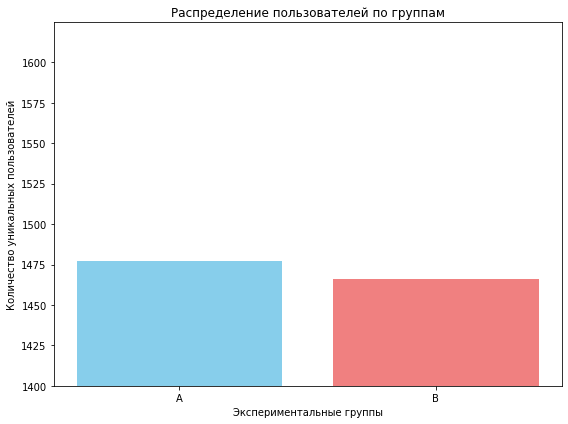

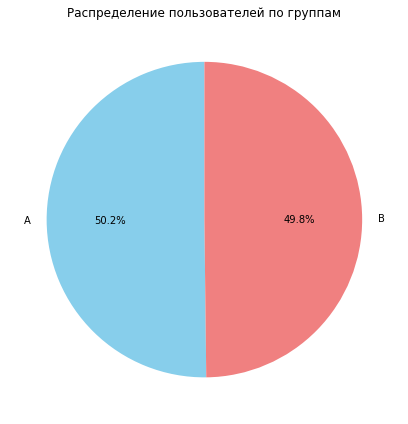

In [18]:
# Визуализация (столбчатая диаграмма)
groups = ['A', 'B']
counts = [users_a, users_b]

plt.figure(figsize=(8, 6))
plt.bar(groups, counts, color=['skyblue', 'lightcoral'])
plt.xlabel('Экспериментальные группы')
plt.ylabel('Количество уникальных пользователей')
plt.title('Распределение пользователей по группам')
plt.ylim(1400, max(counts) * 1.1)  # Регулировка лимитов оси Y для лучшего отображения
plt.tight_layout()
plt.show()

# Альтернативная визуализация (круговая диаграмма)
plt.figure(figsize=(8, 6))
plt.pie(counts, labels=groups, autopct='%1.1f%%', colors=['skyblue', 'lightcoral'], startangle=90)
plt.title('Распределение пользователей по группам')
plt.tight_layout()
plt.show()

#### 3.2. Проверка пересечений пользователей
Помимо проверки равенства количества пользователей в группах полезно убедиться в том, что группы независимы. Для этого нужно убедиться, что никто из пользователей случайно не попал в обе группы одновременно.

- Рассчитайте количество пользователей, которые встречаются одновременно в группах A и B, или убедитесь, что таких нет.

In [19]:
# Выделяем пользователей из группы A
users_a = set(sessions_project_test_part[sessions_project_test_part['test_group'] == 'A']['user_id'].unique())

# Выделяем пользователей из группы B
users_b = set(sessions_project_test_part[sessions_project_test_part['test_group'] == 'B']['user_id'].unique())

# Находим пересечение множеств (пользователи, попавшие в обе группы)
common_users = users_a.intersection(users_b)

# Выводим количество общих пользователей
num_common_users = len(common_users)

print(f"Количество пользователей, одновременно находящихся в группах A и B: {num_common_users}")

Количество пользователей, одновременно находящихся в группах A и B: 0


Видно, что пересечений между группами не обнаружено, что говорит о корректности проведение теста

#### 3.3. Равномерность разделения пользователей по устройствам
Полезно также убедиться в том, что пользователи равномерно распределены по всем доступным категориальным переменным — типам устройства и регионам.

Постройте две диаграммы:

- доля каждого типа устройства для пользователей из группы A,

- доля каждого типа устройства для пользователей из группы B.

Постарайтесь добавить на диаграммы все необходимые подписи, пояснения и заголовки, которые позволят сделать вывод о том, совпадает ли распределение устройств в группах A и B.


In [20]:
# Расчет распределения типов устройств в группе A
device_counts_a = sessions_project_test_part[sessions_project_test_part['test_group'] == 'A']['device'].value_counts(normalize=True) * 100

# Расчет распределения типов устройств в группе B
device_counts_b = sessions_project_test_part[sessions_project_test_part['test_group'] == 'B']['device'].value_counts(normalize=True) * 100

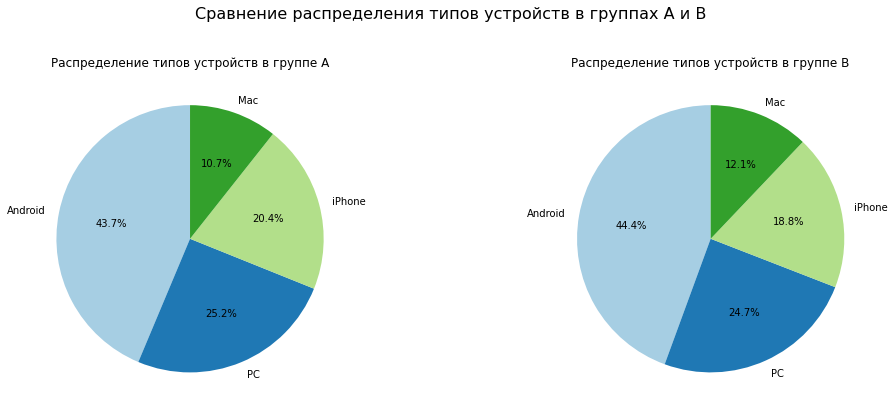

In [21]:
# Создание фигуры с двумя subplots
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# --- Диаграмма для группы A ---
axes[0].pie(device_counts_a, labels=device_counts_a.index, autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)
axes[0].set_title('Распределение типов устройств в группе A')

# --- Диаграмма для группы B ---
axes[1].pie(device_counts_b, labels=device_counts_b.index, autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)
axes[1].set_title('Распределение типов устройств в группе B')

# Добавление общего заголовка для фигуры
fig.suptitle('Сравнение распределения типов устройств в группах A и B', fontsize=16)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Подстройка размещения элементов для предотвращения перекрытия
plt.show()

Из графиков видно, что типы устройств в группах распределены практически одинаково, что говорит о корректности проведения теста

#### 3.4. Равномерность распределения пользователей по регионам
Теперь убедитесь, что пользователи равномерно распределены по регионам.

Постройте две диаграммы:

- доля каждого региона для пользователей из группы A,

- доля каждого региона для пользователей из группы B.

Постарайтесь добавить на диаграммы все необходимые подписи, пояснения и заголовки, которые позволят сделать вывод о том, совпадает ли распределение регионов в группах A и B. Постарайтесь использовать другой тип диаграммы, не тот, что в прошлом задании.


In [22]:
# Расчет распределения регионов в группе A
region_counts_a = sessions_project_test_part[sessions_project_test_part['test_group'] == 'A']['region'].value_counts(normalize=True) * 100

# Расчет распределения регионов в группе B
region_counts_b = sessions_project_test_part[sessions_project_test_part['test_group'] == 'B']['region'].value_counts(normalize=True) * 100

In [32]:
import seaborn as sns

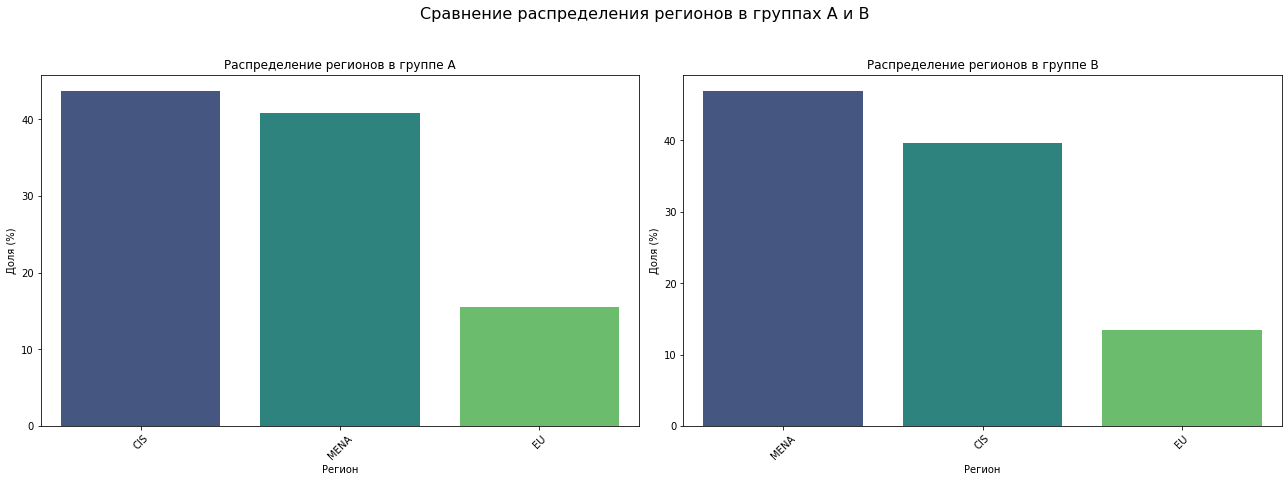

In [33]:
# Создание фигуры с двумя subplots
fig, axes = plt.subplots(1, 2, figsize=(18, 7))

# --- Столбчатая диаграмма для группы A ---
sns.barplot(x=region_counts_a.index, y=region_counts_a.values, ax=axes[0], palette='viridis')
axes[0].set_title('Распределение регионов в группе A')
axes[0].set_xlabel('Регион')
axes[0].set_ylabel('Доля (%)')
axes[0].tick_params(axis='x', rotation=45)

# --- Столбчатая диаграмма для группы B ---
sns.barplot(x=region_counts_b.index, y=region_counts_b.values, ax=axes[1], palette='viridis')
axes[1].set_title('Распределение регионов в группе B')
axes[1].set_xlabel('Регион')
axes[1].set_ylabel('Доля (%)')
axes[1].tick_params(axis='x', rotation=45)

# Добавление общего заголовка для фигуры
fig.suptitle('Сравнение распределения регионов в группах A и B', fontsize=16)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Подстройка размещения элементов для предотвращения перекрытия
plt.show()

Видно, что распределение пользователей немного отличается между группами, но основные показатели схожи

#### 3.5. Вывод после проверки A/B-теста

На основе проведённого анализа A/B-теста сформулируйте и запишите свои выводы. В выводе обязательно укажите:

- Были ли обнаружено различие в количестве пользователей в двух группах.

- Являются ли выборки независимыми. Было ли обнаружено пересечение пользователей из тестовой и контрольной групп.

- Сохраняется ли равномерное распределение пользователей тестовой и контрольной групп по категориальным переменным: устройствам и регионам.

Сделайте заключение о том, корректно ли проходит A/B-тест или наблюдаются какие-либо нарушения.

Из проведенных расчетов проверки работы теста, можно сказать, что тест проходит корректно, аномалий между группами не было обнаружено, и можно переходить к проверке результатов A/B-теста

### 4. Проверка результатов A/B-теста

A/B-тест завершён, и у вас есть результаты за все дни проведения эксперимента. Необходимо убедиться в корректности теста и верно интерпретировать результаты.

#### 4.1. Получение результатов теста и подсчёт основной метрики

- Считайте и сохраните в датафрейм `sessions_test` CSV-файл с историческими данными о сессиях пользователей `sessions_project_test.csv`.

- В датафрейме `sessions_test` создайте дополнительный столбец `good_session`. В него войдёт значение `1`, если за одну сессию было просмотрено 4 и более страниц, и значение `0`, если просмотрено меньше.

In [24]:
#загружаем данные
sessions_test = pd.read_csv('https://code.s3.yandex.net/datasets/sessions_project_test.csv')

In [25]:
# Создание столбца good_session
sessions_test['good_session'] = (sessions_test['page_counter'] >= 4).astype(int)

# Вывод первых нескольких строк датафрейма с новым столбцом для проверки
sessions_test.head()

,user_id,session_id,session_date,session_start_ts,install_date,session_number,registration_flag,page_counter,region,device,test_group,good_session
0,6DAE3B3654DA738E,C69249E26E58F6E2,2025-10-26,2025-10-26 18:15:05,2025-10-16,3,0,3,MENA,Android,A,0
1,0A3FE5D1DD59110A,66D66D7C9F5181B7,2025-10-21,2025-10-21 17:04:53,2025-10-15,2,1,2,CIS,Android,B,0
2,2041F1D7AA740B88,50DE51D42215E74C,2025-10-23,2025-10-23 17:39:29,2025-10-19,3,0,2,MENA,Android,A,0
3,43D7585009168086,5763C0C353C22263,2025-10-24,2025-10-24 15:01:57,2025-10-18,4,0,1,CIS,iPhone,B,0
4,15AD68B14D62D88C,B1AD09F93C1053BC,2025-10-17,2025-10-17 17:34:39,2025-10-17,1,0,2,MENA,Android,B,0


#### 4.2. Проверка корректности результатов теста

Прежде чем приступать к анализу ключевых продуктовых метрик, необходимо убедиться, что тест проведён корректно и вы будете сравнивать две сопоставимые группы.

- Рассчитайте количество уникальных сессий для каждого дня и обеих тестовых групп, используя группировку.

- Проверьте, что количество уникальных дневных сессий в двух выборках не различается или различия не статистически значимы. Используйте статистический тест, который позволит сделать вывод о равенстве средних двух выборок.

- В качестве ответа выведите на экран полученное значение p-value и интерпретируйте его.

In [26]:
# Группировка по session_date и test_group и подсчет уникальных session_id
sessions_per_day = sessions_test.groupby(['session_date', 'test_group'])['session_id'].nunique().reset_index()

# Разделение на две группы
group_A = sessions_per_day[sessions_per_day['test_group'] == 'A']['session_id']
group_B = sessions_per_day[sessions_per_day['test_group'] == 'B']['session_id']


In [27]:
from scipy import stats

In [28]:
# Проверка равенства дисперсий для использования правильного t-теста
levene_result = stats.levene(group_A, group_B)
equal_variances = levene_result.pvalue > 0.05

# Проведение t-теста (Стьюдента)
t_test_result = stats.ttest_ind(group_A, group_B, equal_var=equal_variances)

# Вывод p-value и интерпретация
p_value = t_test_result.pvalue
print(f"P-value: {p_value}")

alpha = 0.05  # Уровень значимости

if p_value < alpha:
    print("Различия в количестве уникальных сессий между группами статистически значимы.")
else:
    print("Различия в количестве уникальных сессий между группами статистически не значимы.")

P-value: 0.938219304859116
Различия в количестве уникальных сессий между группами статистически не значимы.


#### 4.3. Сравнение доли успешных сессий

Когда вы убедились, что количество сессий в обеих выборках не различалось, можно переходить к анализу ключевой метрики — доли успешных сессий.

Используйте созданный на первом шаге задания столбец `good_session` и рассчитайте долю успешных сессий для выборок A и B, а также разницу в этом показателе. Полученный вывод отобразите на экране.

In [29]:
# Расчет доли успешных сессий для каждой группы
success_rate = sessions_test.groupby('test_group')['good_session'].mean()

# Расчет разницы в долях успешных сессий
difference = success_rate['B'] - success_rate['A']

# Вывод результатов
print(f"Доля успешных сессий в группе A: {success_rate['A']:.4f}")
print(f"Доля успешных сессий в группе B: {success_rate['B']:.4f}")
print(f"Разница в долях успешных сессий (B - A): {difference:.4f}")

if difference > 0:
    print("Группа B имеет более высокую долю успешных сессий.")
elif difference < 0:
    print("Группа A имеет более высокую долю успешных сессий.")
else:
    print("Доли успешных сессий в группах A и B равны.")


Доля успешных сессий в группе A: 0.3077
Доля успешных сессий в группе B: 0.3183
Разница в долях успешных сессий (B - A): 0.0106
Группа B имеет более высокую долю успешных сессий.


#### 4.4. Насколько статистически значимо изменение ключевой метрики

На предыдущем шаге вы убедились, что количество успешных сессий в тестовой выборке примерно на 1.1% выше, чем в контрольной, но делать выводы только на основе этого значения будет некорректно. Для принятия решения всегда необходимо отвечать на вопрос: является ли это изменение статистически значимым.

- Используя статистический тест, рассчитайте, является ли изменение в метрике доли успешных сессий статистически значимым.

- Выведите на экран полученное значение p-value и свои выводы о статистической значимости. Напомним, что уровень значимости в эксперименте был выбран на уровне 0.05.

In [30]:
import statsmodels.stats.proportion as proportion

In [31]:
# Подсчет количества успешных и всех сессий для каждой группы
summary_data = sessions_test.groupby('test_group')['good_session'].agg(['sum', 'count'])
successes = summary_data['sum'].values
trials = summary_data['count'].values

# Проведение z-теста для пропорций
z_stat, p_value = proportion.proportions_ztest(successes, trials, alternative='two-sided')

# Вывод p-value и выводы о статистической значимости
print(f"P-value: {p_value:.4f}")

alpha = 0.05  # Уровень значимости

if p_value < alpha:
    print("Изменение в доле успешных сессий статистически значимо.")
else:
    print("Изменение в доле успешных сессий статистически не значимо.")

P-value: 0.0003
Изменение в доле успешных сессий статистически значимо.


#### 4.5. Вывод по результатам A/B-эксперимента


На основании проведенного A/B-теста с целью оценки влияния нового алгоритма рекомендаций на долю успешных сессий (сессий, в которых пользователь просмотрел 4 и более страницы), можно сделать следующие выводы:

Характеристики эксперимента:
* Размер выборки: 17441 пользователей в каждой группе 
* Фактические размеры групп: Группа A - 1477 пользователей, Группа B - 1466 пользователей (разница 0.74%).
* Уникальность пользователей: Пользователи находились только в одной группе (A или B).

Результаты:
* Сопоставимость групп: Статистически значимых различий в количестве уникальных сессий между группами A и B не обнаружено (p-value = 0.9382), что говорит о сопоставимости групп.
*  Доля успешных сессий: Группа A: 0.3077,Группа B: 0.3183,Разница (B - A): 0.0106 (1.06 процентных пункта)

Статистическая значимость: Разница в доле успешных сессий статистически значима (p-value = 0.0003).

Вывод:
Внедрение нового алгоритма рекомендаций оказало положительное влияние на ключевую метрику — долю успешных сессий. В группе B, использовавшей новый алгоритм, доля успешных сессий статистически значимо увеличилась на 1.06 процентных пункта по сравнению с контрольной группой A (p-value = 0.0003).

Рекомендация:
Несмотря на то, что статистическая значимость достигнута, следует учитывать, что фактический размер выборки значительно меньше необходимого.Рекомендуется повторить A/B-тест с более крупными выборками, чтобы убедиться в устойчивости результатов.
Если результаты повторного теста подтвердят положительное влияние нового алгоритма рекомендаций, его можно будет внедрить в приложение. Однако, важно также оценить потенциальные затраты на внедрение и поддержку нового алгоритма, а также рассмотреть возможность анализа других метрик, чтобы получить более полное представление о его влиянии на пользовательский опыт. Кроме того, из-за относительно небольшого размера групп и короткого времени проведения теста, результаты стоит воспринимать как предварительные и требующие подтверждения на большем объеме данных.